In [1]:
# -*- coding:utf-8 -*-
from scipy import stats

[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['genhalflogistic',
 'triang',
 'rayleigh',
 'betaprime',
 'foldnorm',
 'genlogistic',
 'gilbrat',
 'genpareto',
 'lognorm',
 'anglit',
 'truncnorm',
 'expon',
 'norm',
 'nakagami',
 'weibull_min',
 'invgauss',
 'logistic',
 'ncx2',
 'fisk',
 'halfgennorm',
 'tukeylambda',
 'frechet_l',
 'dgamma',
 'pareto',
 'halflogistic',
 'semicircular',
 'invweibull',
 'ksone',
 'mielke',
 't',
 'gengamma',
 'johnsonsu',
 'powernorm',
 'powerlaw',
 'burr',
 'johnsonsb',
 'beta',
 'gamma',
 'wald',
 'ncf',
 'arcsine',
 'maxwell',
 'gausshyper',
 'rice',
 'vonmises_line',
 'loglaplace',
 'exponweib',
 'pearson3',
 'chi',
 'cosine',
 'kstwobign',
 'recipinvgauss',
 'levy_stable',
 'foldcauchy',
 'wrapcauchy',
 'truncexpon',
 'genexpon',
 'erlang',
 'reciprocal',
 'f',
 'lomax',
 'loggamma',
 'invgamma',
 'laplace',
 'powerlognorm',
 'vonmises',
 'exponnorm',
 'frechet_r',
 'dweibull',
 'rdist',
 'gumbel_r',
 'gompertz',
 'halfcauchy',
 'gennorm',
 'exponpow',
 'weibull_max',
 'gumbel_l',
 'halfnorm',

In [2]:
stats.norm.stats()

(array(0.0), array(1.0))

In [3]:
X = stats.norm(loc=1.0, scale=2.0)
X.stats()

(array(1.0), array(4.0))

In [4]:
import numpy as np
x = X.rvs(size=10000)
np.mean(x), np.var(x)

(0.97971226034271275, 4.0612408700742018)

In [5]:
print np.max(x), np.min(x)
print stats.norm.fit(x)

7.68598842974 -6.26072034897
(0.97971226034271275, 2.015252061176021)


In [6]:
pdf, t = np.histogram(x, bins=100, normed=True)
# print t
t = (t[:-1] + t[1:]) * 0.5 # （从0到最后 + 从1到最后）/ 2 求每个区间的中点位置
# print t
cdf = np.cumsum(pdf) * (t[1] - t[0])
p_error = pdf - X.pdf(t)
c_error = cdf - X.cdf(t)
print "max pdf error: {}, max cdf error: {}".format(np.abs(p_error).max(), np.abs(c_error).max())

max pdf error: 0.0223627711756, max cdf error: 0.0196919147533


In [7]:
x = range(1, 7)
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

dice = stats.rv_discrete(values=(x, p))
dice.rvs(size=20)

array([1, 1, 3, 5, 1, 2, 1, 1, 1, 6, 5, 1, 1, 3, 1, 2, 1, 1, 1, 1])

In [8]:
np.random.seed(42)
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis=1)
print samples_mean
print dice.stats()
print stats.norm.fit(samples_mean) # 期望为μ，方差为σ/n

[ 2.32  2.64  2.56 ...,  2.46  2.96  2.68]
(array(2.6), array(3.04))
(2.6013379999999997, 0.248077185077548)


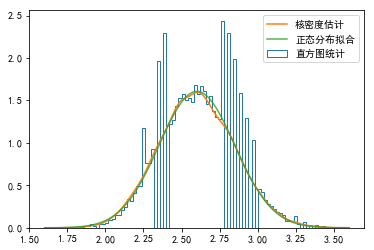

In [9]:
#coding:utf-8
import matplotlib.pyplot as pl

pl.rcParams['font.sans-serif']=['SimHei']
pl.rcParams['axes.unicode_minus']=False

_, bins, step = pl.hist(samples_mean, bins=100, normed=True, histtype="step", label=u"直方图统计")
kde = stats.kde.gaussian_kde(samples_mean)
x = np.linspace(bins[0], bins[-1], 100)
pl.plot(x, kde(x), label=u"核密度估计")
mean, std = stats.norm.fit(samples_mean)
pl.plot(x, stats.norm(mean, std).pdf(x), alpha=0.8, label=u"正态分布拟合")
pl.legend()
pl.show()

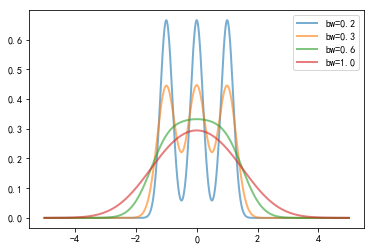

In [10]:
for bw in [0.2, 0.3, 0.6, 1.0]:
    kde = stats.gaussian_kde([-1, 0, 1], bw_method=bw)
    x = np.linspace(-5, 5, 1000)
    y = kde(x)
    pl.plot(x, y, lw=2, label="bw={}".format(bw), alpha=0.6)
pl.legend(loc="best")
pl.show()

In [11]:
np.random.seed(42)

def sim_poisson(lambda_, time):
    t = np.random.uniform(0, time, size=lambda_ * time)
    count, time_edges = np.histogram(t, bins=time, range=(0, time))
    dist, count_edges = np.histogram(count, bins=20, range=(0, 20), density=True)
    x = count_edges[:-1]
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist

lambda_ = 10
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])
max_error1 = np.max(np.abs(dist1 - poisson1))
max_error2 = np.max(np.abs(dist2 - poisson2))
print "time={}, max_error={}".format(times[0], max_error1)
print "time={}, max_error={}".format(times[1], max_error2)

time=1000, max_error=0.019642302016
time=50000, max_error=0.00179801289496


In [12]:
T = 100000 # 模拟的总时间
A_count = T / 5  # T时间内公交车A到达站点S的次数
B_count = T / 10 # T时间内公交车B到达站点S的次数

# 使用均匀分布模拟公交车到达S站点的时刻
A_time = np.random.uniform(0, T, A_count) 
B_time = np.random.uniform(0, T, B_count)

# 合并A、B公交车到达S的时刻并排序
bus_time = np.concatenate((A_time, B_time))
bus_time.sort()

N = 200000 # 到达S站点乘客的数量
# 使用均匀分布模拟在第一辆和最后一辆公交车到达S的两个时刻之间N个乘客到达S时的时刻
passenger_time = np.random.uniform(bus_time[0], bus_time[-1], N)

# np.searchsorted(a, v, side='left', sorter=None)
# Find the indices into a sorted array a such that,
# if the corresponding elements in v were inserted 
# before the indices, the order of a would be preserved.
# 返回passenger_time数组中的每个元素应该插入在bus_time数组中那个元素的左边，返回bus_time
# 数组中对应元素的索引坐标数组，该数组大小与passsenger_time数组大小相同。
idx = np.searchsorted(bus_time, passenger_time)
np.mean(bus_time[idx] - passenger_time) * 60

201.94534998587028

In [13]:
from scipy import integrate

t = 10.0 / 3
bus_interval = stats.gamma(1, scale=t)
n, _ = integrate.quad(lambda x: 0.5 * x * x * bus_interval.pdf(x), 0, 1000)
d, _ = integrate.quad(lambda x: x * bus_interval.pdf(x), 0, 1000)
n / d * 60

200.0

从均值为$\mu$的正态分布中，抽取有$n$个值的样本，计算样本均值$\overline{X}$和样本方差$s$：
$$\overline{X}=\frac{X_1+\cdots+X_n}{n},\quad S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2$$
则$t=\frac{\overline{X}-\mu}{s/\sqrt{n}}$符合$df=n-1$的学生$t$-分布。$t$值是抽选的样本的平均值与整体样本的期望值之差经过正规化之后的数值，可以用来描述抽取的样本与整体样本之间的差异。

In [14]:
mu = 0.0
n = 10
samples = stats.norm(mu).rvs(size=(100000, n))
t_samples = (np.mean(samples, axis=1) - mu) / np.std(samples, ddof=1, axis=1) * n**0.5
print t_samples.shape
sample_dist, x = np.histogram(t_samples, bins=100, density=True)
x = 0.5 * (x[:-1] + x[1:])
t_dist = stats.t(n-1).pdf(x)
print "max error:", np.max(np.abs(sample_dist - t_dist))

(100000,)
max error: 0.00727345596251


### 置信区间
$Pr(c1\le\mu{\le}c2)=1-\alpha$，其中$\alpha$为显著水平

In [15]:
n = 30
np.random.seed(42)
s = stats.norm.rvs(loc=1, scale=0.8, size=n)

t = (np.mean(s) - 0.5) / (np.std(s, ddof=1) / np.sqrt(n))
print t, stats.ttest_1samp(s, 0.5)

2.65858434088 Ttest_1sampResult(statistic=2.6585843408822241, pvalue=0.012637702257091229)


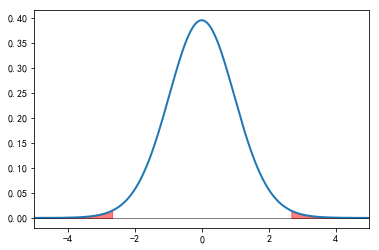

In [18]:
x = np.linspace(-5, 5, 500)
y = stats.t(n-1).pdf(x)
pl.plot(x, y, lw=2)
t, p = stats.ttest_1samp(s, 0.5)
mask = x > np.abs(t)
pl.fill_between(x[mask], y[mask], color="red", alpha=0.5)
mask = x < -np.abs(t)
pl.fill_between(x[mask], y[mask], color="red", alpha=0.5)
pl.axhline(color="k", lw=0.5)
pl.xlim(-5, 5)
pl.show()

In [17]:
m = 200000
mean = 0.5
r = stats.norm.rvs(loc=mean, scale=0.8, size=(m,n))
ts = (np.mean(s) - mean) / (np.std(s, ddof=1) / np.sqrt(n))
tr = (np.mean(r, axis=1) - mean) / (np.std(r, ddof=1, axis=1) / np.sqrt(n))
np.mean(np.abs(tr) > np.abs(ts))

0.012695

卡方分布($\chi^2$)是k个**独立的标准正态分布变量**的平方和的分布，自由度为k。

In [19]:
a = np.random.normal(size=(300000, 4))
cs = np.sum(a**2, axis=1)

sample_dist, bins = np.histogram(cs, bins=100, range=(0, 20), density=True)
x = 0.5 * (bins[:-1] + bins[1:])
chi2_dist = stats.chi2.pdf(x, 4)
print "max error:", np.max(np.abs(sample_dist - chi2_dist))

max error: 0.00355101622573


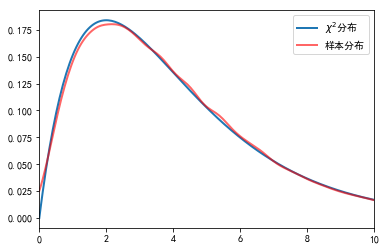

In [22]:
repeat_count = 60000
n, k = 100, 5

np.random.seed(42)
ball_ids = np.random.randint(0, k, size=(repeat_count, n))
counts = np.apply_along_axis(np.bincount, 1, ball_ids, minlength=k)
cs2 = np.sum((counts - n/k)**2.0 / (n/k), axis=1)
k = stats.kde.gaussian_kde(cs2)
x = np.linspace(0, 10, 200)
pl.plot(x, stats.chi2.pdf(x, 4), lw=2, label=u"$\chi^2$分布")
pl.plot(x, k(x), lw=2, color="red", alpha=0.6, label=u"样本分布")
pl.legend(loc="best")
pl.xlim(0, 10)
pl.show()

In [23]:
def choose_balls(probabilities, size):
    r = stats.rv_discrete(values=(range(len(probabilities)), probabilities))
    s = r.rvs(size=size)
    counts = np.bincount(s)
    return counts

np.random.seed(42)
counts1 = choose_balls([0.18, 0.24, 0.25, 0.16, 0.17], 400)
counts2 = choose_balls([0.2]*5, 400)

print counts1
print counts2

[80 93 97 64 66]
[89 76 79 71 85]


In [24]:
chi1, p1 = stats.chisquare(counts1)
chi2, p2 = stats.chisquare(counts2)

print "chi1 =", chi1, "p1 =", p1
print "chi2 =", chi2, "p2 =", p2

chi1 = 11.375 p1 = 0.0226576012398
chi2 = 2.55 p2 = 0.635705452704


In [25]:
table = [[43, 9], [44, 4]]
chi2, p, dof, expected = stats.chi2_contingency(table)

print chi2, p

1.0724852071 0.300384770391


In [26]:
stats.fisher_exact(table)

(0.43434343434343436, 0.23915695682225505)